In [1]:

import matplotlib
import matplotlib.pyplot as plt

import numpy as np


## Per Hand Methode aus dem Skript

In [2]:
x1=np.array([1,3,1,2,3,2])
x2=np.array([1,0,3,0,1,1])
X = np.array([[1,3,1,2,3,2],[1,0,3,0,1,1]])


In [3]:
print(X)

[[1 3 1 2 3 2]
 [1 0 3 0 1 1]]


### 1) Daten um Mittelwert zentrieren

In [4]:
X= X-X.mean(axis=0)
print(X)

[[ 0.   1.5 -1.   1.   1.   0.5]
 [ 0.  -1.5  1.  -1.  -1.  -0.5]]


### 2) Kovarianzmatrix berechnen

In [5]:
c = np.cov(X, rowvar=False)
print(c)

[[ 0.   0.   0.   0.   0.   0. ]
 [ 0.   4.5 -3.   3.   3.   1.5]
 [ 0.  -3.   2.  -2.  -2.  -1. ]
 [ 0.   3.  -2.   2.   2.   1. ]
 [ 0.   3.  -2.   2.   2.   1. ]
 [ 0.   1.5 -1.   1.   1.   0.5]]


## 3) Eigenwerte Berechnen

In [6]:

l, W = np.linalg.eigh(c)
print("Eigenwerte:")
print(l)
print("Eigenvektoren:")
print(W)

Eigenwerte:
[-2.79323634e-15 -4.56449334e-48  0.00000000e+00  3.28404545e-17
  6.50972136e-16  1.10000000e+01]
Eigenvektoren:
[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00]
 [ 7.51029751e-01  2.55921031e-17  0.00000000e+00  1.63244906e-01
   1.46459975e-02  6.39602149e-01]
 [ 4.21757876e-01 -3.13398590e-17  0.00000000e+00 -2.00180995e-01
  -7.74744914e-01 -4.26401433e-01]
 [-1.69270534e-01 -1.27633848e-16  0.00000000e+00 -8.83060140e-01
  -9.86615126e-02  4.26401433e-01]
 [-4.28412973e-01 -4.47213595e-01  0.00000000e+00  3.50409428e-01
  -5.58441918e-01  4.26401433e-01]
 [-2.14206486e-01  8.94427191e-01  0.00000000e+00  1.75204714e-01
  -2.79220959e-01  2.13200716e-01]]


### 4) EW & EV der Größe nach sortieren

In [7]:
# Reihenfolge umkehren. Größte Eigenwerte zuerst.
l = l[::-1]
W = W[:, ::-1]
print("Eigenwerte:")
print(l)
print("Eigenvektoren:")
print(W)

Eigenwerte:
[ 1.10000000e+01  6.50972136e-16  3.28404545e-17  0.00000000e+00
 -4.56449334e-48 -2.79323634e-15]
Eigenvektoren:
[[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.39602149e-01  1.46459975e-02  1.63244906e-01  0.00000000e+00
   2.55921031e-17  7.51029751e-01]
 [-4.26401433e-01 -7.74744914e-01 -2.00180995e-01  0.00000000e+00
  -3.13398590e-17  4.21757876e-01]
 [ 4.26401433e-01 -9.86615126e-02 -8.83060140e-01  0.00000000e+00
  -1.27633848e-16 -1.69270534e-01]
 [ 4.26401433e-01 -5.58441918e-01  3.50409428e-01  0.00000000e+00
  -4.47213595e-01 -4.28412973e-01]
 [ 2.13200716e-01 -2.79220959e-01  1.75204714e-01  0.00000000e+00
   8.94427191e-01 -2.14206486e-01]]


### 5) W auf jede Zeile auf mit jeder Beobachtung $x_i$ in $\boldsymbol{X}$ 

In [8]:
X_prime = X @ W

In [9]:
print(X_prime)

[[ 2.34520788e+00 -1.94289029e-16  1.80411242e-16  0.00000000e+00
   5.55111512e-17  2.08166817e-16]
 [-2.34520788e+00  1.94289029e-16 -1.80411242e-16  0.00000000e+00
  -5.55111512e-17 -2.08166817e-16]]


# Aufgabe 15

### a)

In [10]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000, centers=2, n_features=4, random_state=0)
print(X)

[[ 0.03838985  4.73689528  1.64932579  1.62203216]
 [-1.28401419  2.51704755 -2.26981563  7.3654357 ]
 [ 2.13045411  4.47629174  2.07632954  0.99711812]
 ...
 [ 0.63459198  4.32807824  3.33507954  0.01169718]
 [ 0.73493229  3.42559698  2.75464801 -0.16355863]
 [ 0.37243053  3.15423326  3.15357106  0.75982448]]


Text(0, 0.5, 'X2')

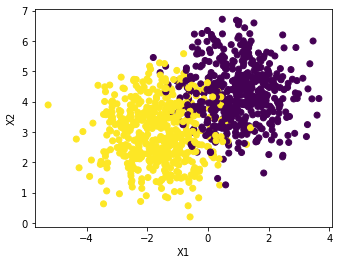

In [11]:
fig, ax = plt.subplots()
ax.set_aspect(1)
ax.scatter(X[:, 0], X[:, 1], c=y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
transformed = pca.fit_transform(X)
print(transformed)

[[-3.11947993 -0.50370457 -0.59122553 -0.41121517]
 [ 4.08148759 -0.27931075  1.16505305 -0.2267435 ]
 [-4.43668109  1.03308869  0.36793997 -0.38390278]
 ...
 [-5.28565258 -0.23467501 -0.8163596   0.65750679]
 [-5.08748854 -0.47278801  0.14533989  1.07141894]
 [-4.3139952  -0.20959674 -0.37023055  1.60381664]]


In [13]:
cov = pca.get_covariance()
print(cov)

[[ 2.62583302  0.80302067  2.12234349 -4.3783228 ]
 [ 0.80302067  1.33533433  1.09428645 -2.18876646]
 [ 2.12234349  1.09428645  3.69087992 -5.66291375]
 [-4.3783228  -2.18876646 -5.66291375 12.75375474]]


In [14]:
l, W = np.linalg.eigh(cov)
print(l)

[ 0.89875061  0.98813673  0.99958442 17.51933024]


Die Varianzen der jeweiligen Features sind dich Eigenwerte der Covarianzmatrix. Die ersten drei Features haben eine ähnlich große Varianz. Das letzte Feature hat sehr stark gestreute Werte.

### c)

(array([  5.,  14.,  16.,  54.,  75., 101.,  81.,  71.,  42.,  22.,  15.,
          3.,   1.,   0.,   0.,   0.,   0.,   1.,   4.,  17.,  36.,  55.,
         84.,  89.,  84.,  59.,  41.,  23.,   6.,   1.]),
 array([-6.81001256, -6.34989753, -5.88978249, -5.42966746, -4.96955242,
        -4.50943739, -4.04932235, -3.58920731, -3.12909228, -2.66897724,
        -2.20886221, -1.74874717, -1.28863214, -0.8285171 , -0.36840207,
         0.09171297,  0.551828  ,  1.01194304,  1.47205807,  1.93217311,
         2.39228814,  2.85240318,  3.31251821,  3.77263325,  4.23274828,
         4.69286332,  5.15297835,  5.61309339,  6.07320842,  6.53332346,
         6.99343849]),
 <BarContainer object of 30 artists>)

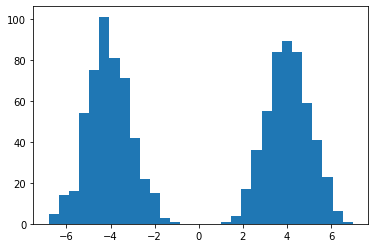

In [15]:
plt.hist(transformed[:, 0], bins = 30)

(array([ 1.,  6.,  4.,  5.,  5., 19., 16., 26., 35., 36., 61., 63., 74.,
        62., 81., 94., 72., 68., 62., 49., 47., 34., 29., 21., 13.,  9.,
         5.,  1.,  1.,  1.]),
 array([-3.02773021, -2.82512449, -2.62251878, -2.41991306, -2.21730735,
        -2.01470163, -1.81209591, -1.6094902 , -1.40688448, -1.20427877,
        -1.00167305, -0.79906734, -0.59646162, -0.3938559 , -0.19125019,
         0.01135553,  0.21396124,  0.41656696,  0.61917267,  0.82177839,
         1.0243841 ,  1.22698982,  1.42959554,  1.63220125,  1.83480697,
         2.03741268,  2.2400184 ,  2.44262411,  2.64522983,  2.84783554,
         3.05044126]),
 <BarContainer object of 30 artists>)

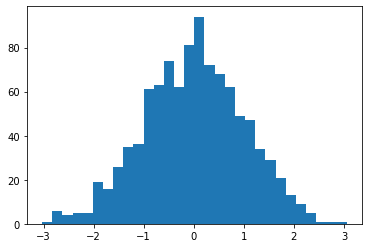

In [16]:
plt.hist(transformed[:, 1], bins = 30)

(array([  1.,   0.,   1.,   3.,   2.,   8.,  15.,  25.,  35.,  51.,  56.,
         72.,  71.,  82., 115., 109.,  71.,  63.,  61.,  54.,  39.,  31.,
         17.,   9.,   3.,   2.,   1.,   2.,   0.,   1.]),
 array([-3.49407982, -3.25578649, -3.01749316, -2.77919983, -2.5409065 ,
        -2.30261317, -2.06431984, -1.82602651, -1.58773318, -1.34943985,
        -1.11114652, -0.87285319, -0.63455986, -0.39626653, -0.1579732 ,
         0.08032013,  0.31861346,  0.55690679,  0.79520012,  1.03349344,
         1.27178677,  1.5100801 ,  1.74837343,  1.98666676,  2.22496009,
         2.46325342,  2.70154675,  2.93984008,  3.17813341,  3.41642674,
         3.65472007]),
 <BarContainer object of 30 artists>)

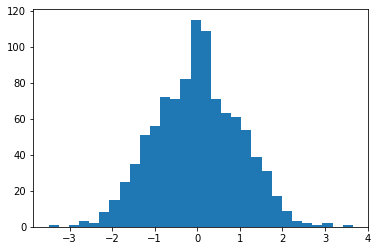

In [17]:
plt.hist(transformed[:, 2], bins = 30)

(array([ 7.,  6.,  6., 20., 21., 32., 32., 50., 71., 66., 79., 78., 86.,
        71., 78., 68., 60., 53., 37., 26., 20.,  7., 11.,  5.,  5.,  1.,
         3.,  0.,  0.,  1.]),
 array([-2.47160657, -2.27254277, -2.07347898, -1.87441518, -1.67535139,
        -1.47628759, -1.2772238 , -1.07816001, -0.87909621, -0.68003242,
        -0.48096862, -0.28190483, -0.08284103,  0.11622276,  0.31528656,
         0.51435035,  0.71341415,  0.91247794,  1.11154173,  1.31060553,
         1.50966932,  1.70873312,  1.90779691,  2.10686071,  2.3059245 ,
         2.5049883 ,  2.70405209,  2.90311589,  3.10217968,  3.30124348,
         3.50030727]),
 <BarContainer object of 30 artists>)

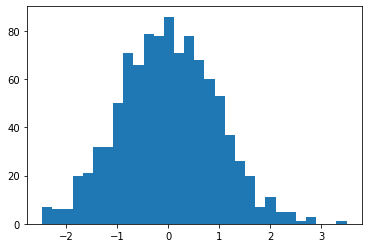

In [18]:
plt.hist(transformed[:, 3], bins = 30)

Text(0, 0.5, 'X2')

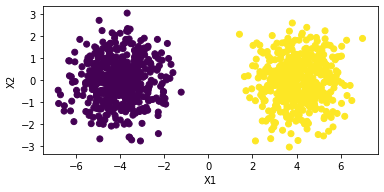

In [19]:
fig, ax = plt.subplots()
ax.set_aspect(1)
ax.scatter(transformed[:, 0], transformed[:, 1], c=y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')